In [1]:
import tensorflow as tf
import os
from subprocess import call
import pandas as pd
import imageio
import scipy.misc
import skimage
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from sklearn.model_selection import train_test_split

## Preparing Data for ML

In [2]:
#converting csv file into pandas dataframe

df = pd.read_csv('HAM10000_metadata.csv')
df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
5,HAM_0001466,ISIC_0027850,bkl,histo,75.0,male,ear
6,HAM_0002761,ISIC_0029176,bkl,histo,60.0,male,face
7,HAM_0002761,ISIC_0029068,bkl,histo,60.0,male,face
8,HAM_0005132,ISIC_0025837,bkl,histo,70.0,female,back
9,HAM_0005132,ISIC_0025209,bkl,histo,70.0,female,back


### Making Images Squares

In [4]:
# images are resized to (150,150)
# creates new column and attaches squared images to dataframe


output_shape = (150,150)
df["image"] = df["image_id"].map((lambda id : skimage.transform.resize(imageio.imread("train/" + id + ".jpg"), output_shape)))




/Users/dylancordaro/miniconda3/envs/tensorflow_env/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/dylancordaro/miniconda3/envs/tensorflow_env/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [ ]:
df

### Normalizing

In [5]:


pd.options.mode.chained_assignment = None  # default='warn'


# given a dataframe, changes images to the norm
def inner_class_norm(df_class):
    df_array = np.asarray(df_class['image'].tolist())
    df_mean = np.mean(df_array)
    df_std = np.std(df_array)
    for i in df_class.index:
        df_class["image"][i] = (df_class["image"][i]-df_mean)/df_std
    return



# Inner class normalizations 

# df_class_bkl = df[df.dx=='bkl']
# df_class_nv = df[df.dx=='nv']
# df_class_df = df[df.dx=='df']
# df_class_mel = df[df.dx=='mel']
# df_class_vasc = df[df.dx=='vasc']
# df_class_bcc = df[df.dx=='bcc']
# df_class_akiec = df[df.dx=='akiec']


# inner_class_norm(df_class_bkl)
# inner_class_norm(df_class_nv)  
# inner_class_norm(df_class_df)  
# inner_class_norm(df_class_mel)  
# inner_class_norm(df_class_vasc) 
# inner_class_norm(df_class_bcc)  
# inner_class_norm(df_class_akiec)  



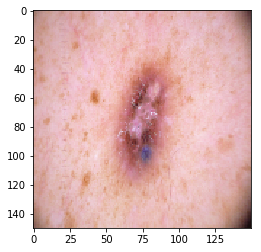

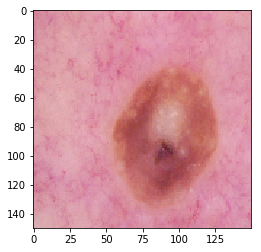

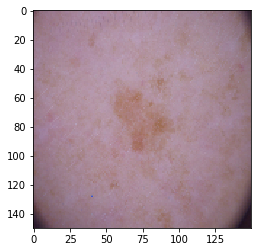

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


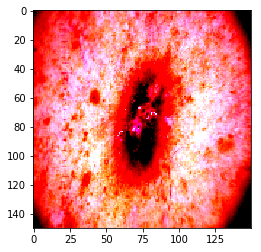

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


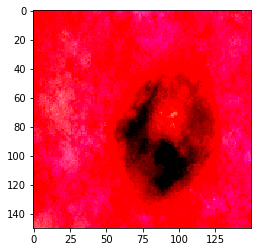

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


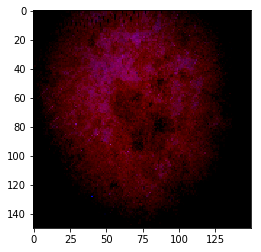

In [7]:
df_normalized = df.copy()
inner_class_norm(df_normalized)



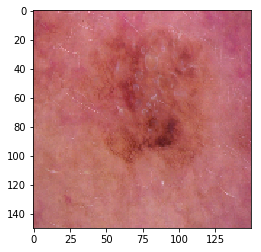

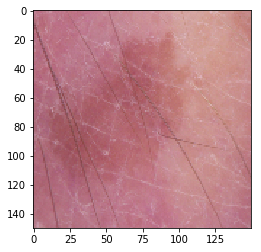

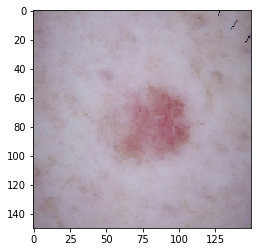

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


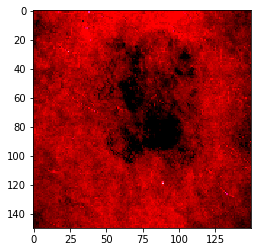

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


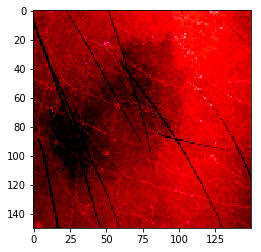

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


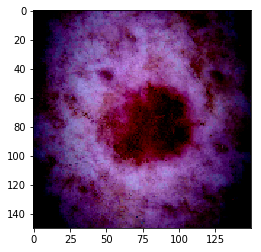

In [9]:
plt.imshow(df["image"][1043]);plt.show()
plt.imshow(df["image"][989]);plt.show()
plt.imshow(df["image"][300]);plt.show()

plt.imshow(df_normalized["image"][1043]);plt.show()
plt.imshow(df_normalized["image"][989]);plt.show()
plt.imshow(df_normalized["image"][300]);plt.show()

### Flipping Images Vertically and Horizontally

In [154]:
df_flip = df_normalized.copy()

for i in df_flip.index:
    df_flip["image"][i] = np.flipud(np.fliplr(df_flip["image"][i]))

In [155]:
# new dataframe for ml
df_norm_flip = pd.concat([df_normalized, df_flip])

df_norm_flip.shape

(20030, 8)

## Train-Test-Split

In [156]:
labels = {"bkl" : 0, "nv": 1, "df": 2, "mel":3, "vasc":4, "bcc":5, "akiec":6}
images=df_norm_flip["image"]
diagnosis=df_norm_flip.dx.unique()
target = list(enumerate(diagnosis))


In [157]:
# maps labels to an integer between 0 - 6
targets = df_norm_flip["dx"].map(lambda x : labels.get(x))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


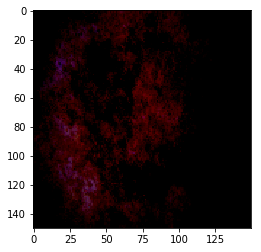

(3008, 150, 150, 3)


In [158]:

test_size = .15
val_size = .15
X_train = []
X_test = []
y_train = []
y_test = []
X_val = []
y_val = []
for i in range(7):
    indices = (targets == i)
    X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(images[indices], targets[indices], test_size = test_size)
    #print(X_train_temp)
    X_train_temp, X_val_temp, y_train_temp, y_val_temp = train_test_split(X_train_temp, y_train_temp, test_size = val_size/(1-test_size))
    X_train = X_train + list(X_train_temp)
    X_test = X_test + list(X_test_temp)
    y_train = y_train + list(y_train_temp)
    y_test = y_test + list(y_test_temp)
    X_val = X_val + list(X_val_temp )
    y_val = y_val + list(y_val_temp)
    



# plt.imshow(X_test[0]);plt.show()


## CNN Architecture

In [160]:
input_shape = (150, 150, 3)
num_classes = 7

model = tf.keras.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=input_shape))
model.add(layers.Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same',))
model.add(layers.MaxPool2D(pool_size = (2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.40))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 150, 150, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 75, 75, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 37, 37, 64)        0         
__________

## Optimize and Fit

In [161]:
optimizer = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [162]:
y_train_real = np.zeros((len(y_train), 7))
for i in range(len(y_train)):
    y_train_real[i,y_train[i]] = 1
    
y_val_real = np.zeros((len(y_val), 7))
for i in range(len(y_val)):
    y_val_real[i,y_val[i]] = 1
X_train = np.array(X_train)
X_val = np.array(X_val)

In [ ]:
# Fit the model
epochs = 50 
batch_size = 10
model.fit(X_train, np.array(y_train_real), epochs=20, batch_size=32, callbacks=[learning_rate_reduction], validation_data = (X_val, y_val_real))

Train on 14015 samples, validate on 3007 samples
Epoch 1/20
 4800/14015 [=========>....................] - ETA: 21:57 - loss: 1.0983 - acc: 0.6665

## Saving Model

In [ ]:

tf.keras.models.save_model(
    model,
    "scratch_model2.h5",
    overwrite=True,
    include_optimizer=True
)

In [ ]:
np.save("X_train.npy",X_train)
np.save("X_val.npy", X_val)
np.save("X_test.npy", X_test)

np.save("y_train.npy",y_train)
np.save("y_val.npy", y_val)
np.save("y_test.npy", y_test)

In [59]:
#assumes RGB is from 0 to 1. 
#the  sqrt3 is for normalization. 
import scipy.ndimage
def gray_world_channel(channel, sigma = 0, p = 6):
        new_channel = np.divide(channel, np.power(np.sum(np.power(scipy.ndimage.gaussian_filter(channel, sigma) p))/channel.size, 1/p) * np.sqrt(3))
    return new_channel

def gray_world(image, sigma = 0, p=6):
    new_image = np.zeros(image.shape)
    for i in range(3):
        new_image[:,:,i] = gray_world_channel(image[:,:,i], sigma, p)
    return new_image

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 6)

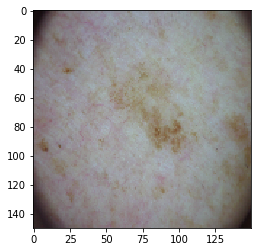

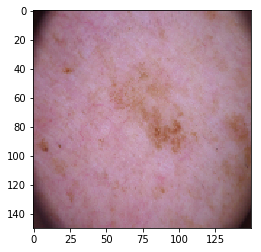

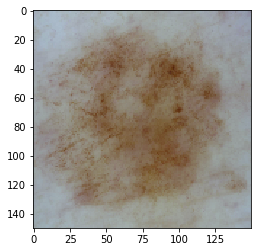

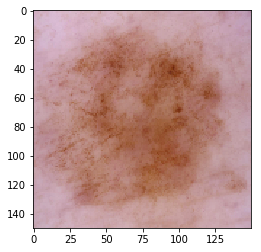

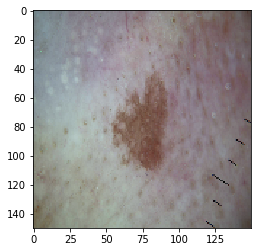

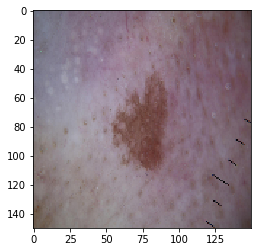

In [61]:
list_of_indices = [888,555,666]
for index in list_of_indices:
    plt.imshow(gray_world(df["image"][index]));plt.show()
    plt.imshow(df["image"][index]);plt.show()


In [57]:
scipy.ndimage.gaussian_filter([[1,2,3],[4,5,6],[7,8,9]], 1)

array([[2, 3, 3],
       [4, 5, 5],
       [5, 6, 6]])